# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Digit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [12]:
# Choisir une année
year = 1939

In [13]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

2

In [14]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [15]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

2

In [16]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"L'hérésie de la S.D.N.\nLE POINT DE VUE\nFRANÇAIS\nM. Maunoe Prix dan “La Petit °*rlsien ’ est sévère pour l'inutile sesalon do la Sociate des Nations :\nXI ne faut compter ni sur les ombres,\nni sur les f"

In [17]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [18]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"L'hérésie de la S.D.N.\nLE POINT DE VUE\nFRANÇAIS\nM. Maunoe Prix dan “La Petit °*rlsien ’ est sévère pour l'inutile sesalon do la Sociate des Nations :\nXI ne faut compter ni sur les ombres,\nni sur les fantôme# pour éteindre les\nincendies.\nLa prochaine session de la S. D N. ils\nchangera donc rien à rien. Lee crimes\nhitlérien^ et staliniens ne seront pas\nréparés.\ns Tchécoslovaquie, l'Autriche,\nla Pologne, la Finlande ne seront pas dé\xad\nlivrées. La même menace pèsera sur tous\nles paya neutres. Les par"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [19]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [20]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1939_clean.txt!'

In [21]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'HÉRÉSIE POINT VUE FRANÇAIS MAUNOE PRIX DAN PETIT RLSIEN SÉVÈRE INUTILE SESALON SOCIATE NATIONS COMPTER OMBRES FANTÔME ÉTEINDRE INCENDIES PROCHAINE SESSION CHANGERA RIEN RIEN LEE CRIMES HITLÉRIEN STALINIENS RÉPARÉS TCHÉCOSLOVAQUIE AUTRICHE POLOGNE FINLANDE LIVRÉES MENACE PÈSERA PAYA NEUTRES PAROLES LORMULES DOCTES DÉLIBÉRATIONS HÉLAS AUJOURD HUI TOTALEMENT VAINES AGIT PALABRES AGIT SEULEMENT MAÎTRISER INCENDIE RAISON INCENDIAIRES PERMETS CEPENDANT PENSER BON INUTILE SESSION LIEU MOMENT FLAMMES ÉL'

## Nuage de mots

### Afficher les termes les plus fréquents


In [22]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GUERRE', 23), ('FRANCE', 16), ('ALLEMAGNE', 15), ('ANGLETERRE', 15), ('FINLANDE', 13), ('BON', 13), ('MER', 13), ('GOUVERNEMENT', 12), ('RUSSIE', 12), ('BALKANS', 12)]


### Créer, stocker et afficher le nuage de mots

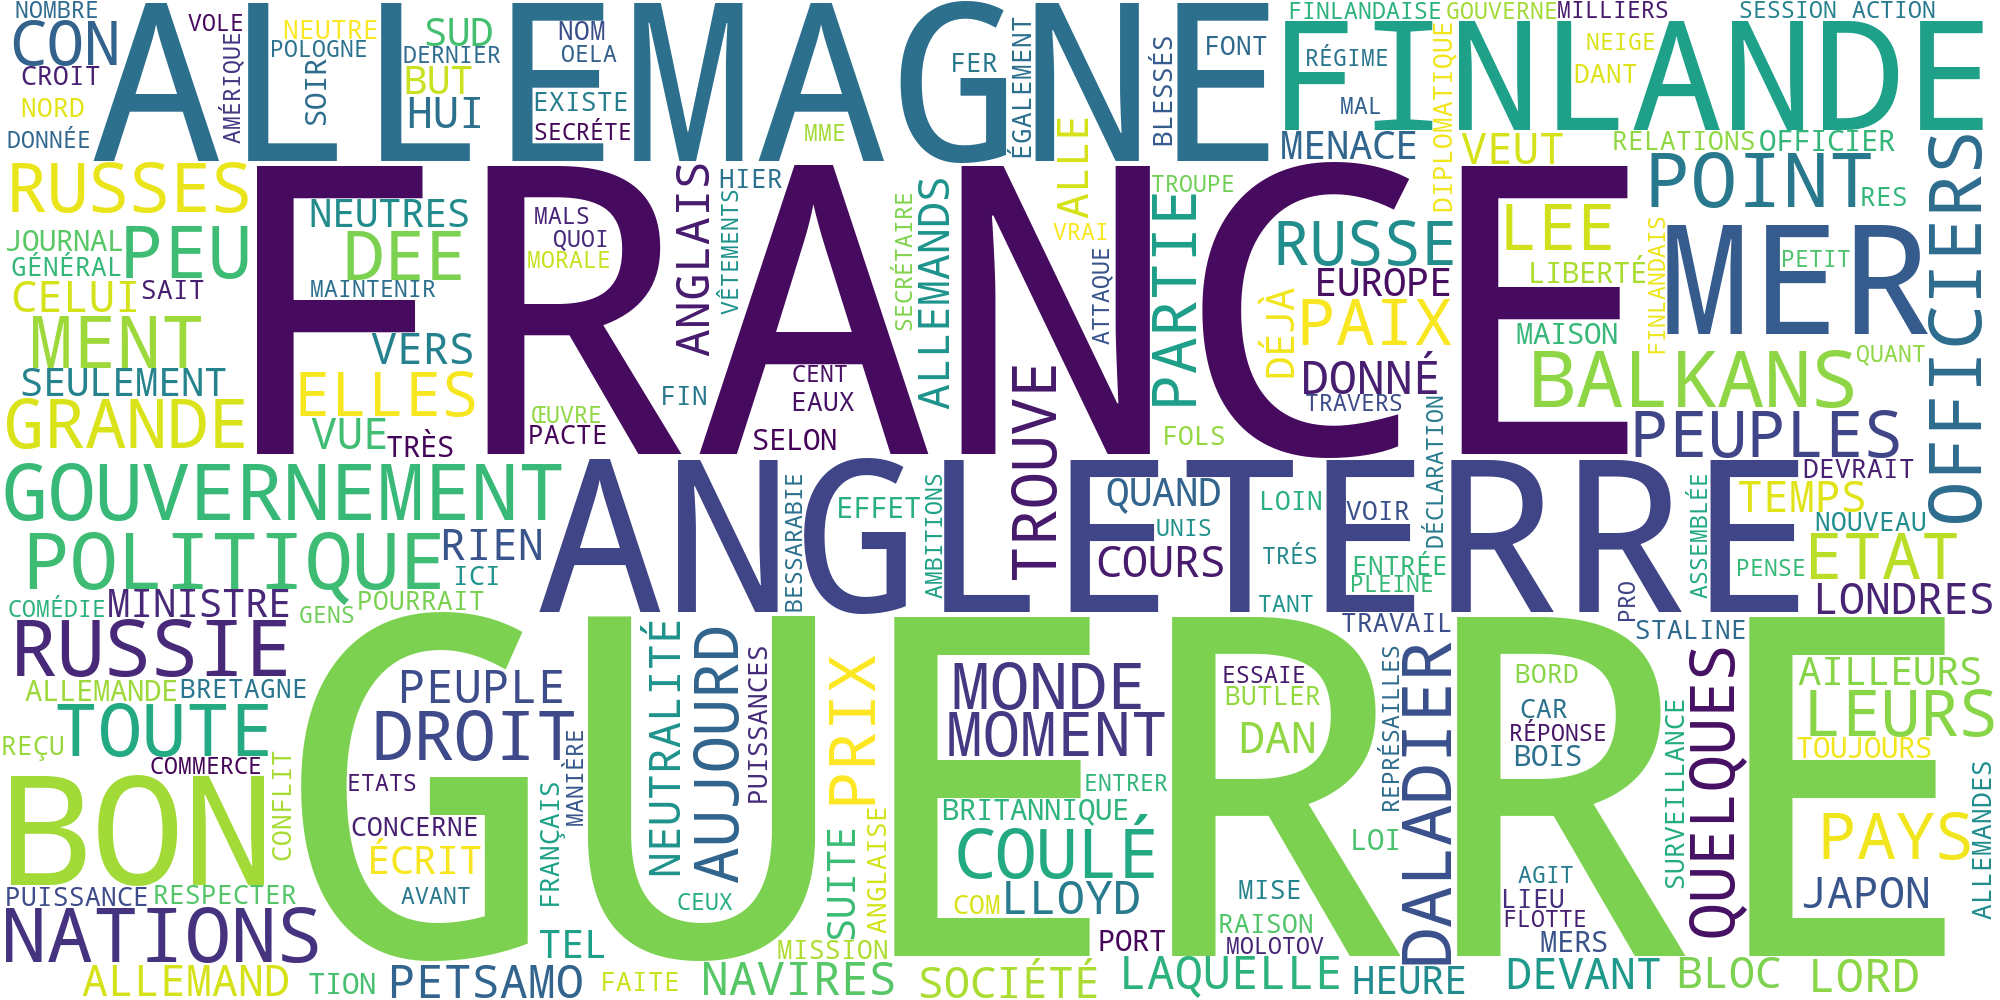

In [23]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))